# Example of support chinese in Spark OCR

## Install spark-ocr python packge
Need specify `secret`

In [1]:
secret = ""
license = ""
version = secret.split("-")[0]
spark_ocr_jar_path = "../../target/scala-2.11"

In [ ]:
# install from PYPI using secret
%pip install spark-ocr==$version+spark32 --extra-index-url=https://pypi.johnsnowlabs.com/$secret --upgrade

## Initialization of spark session

In [ ]:
from pyspark.sql import SparkSession
from sparkocr import start
import os

if license:
    os.environ['JSL_OCR_LICENSE'] = license

spark = start(spark_ocr_jar_path, secret=secret)
spark

## Import OCR transformers

In [ ]:
from sparkocr.transformers import *
from sparkocr.enums import *
from pyspark.ml import PipelineModel
from sparkocr.utils import *

## Define OCR transformers and pipeline

In [ ]:
def pipeline():
    
    binary_to_image = BinaryToImage()
    binary_to_image.setInputCol("content")
    binary_to_image.setOutputCol("image")
    
    # Run OCR
    ocr = ImageToText()
    ocr.setInputCol("image")
    ocr.setOutputCol("text")
    ocr.setLanguage("simplified_chinese"")
    
    pipeline = PipelineModel(stages=[
        binary_to_image,
        ocr
    ])
    
    return pipeline

## Read image as binary file

In [ ]:
import pkg_resources

doc_example = pkg_resources.resource_filename('sparkocr', 'resources/ocr/images/11.png')
image_example_df = spark.read.format("binaryFile").load(image_example).cache()


## Run OCR pipelines

In [ ]:
result = pipeline().transform(image_example_df).cache()

## Display results

In [ ]:
result.select("pagenum","text", "confidence").show()

+-------+----------------------------+-----------------+
|pagenum|                        text|       confidence|
+-------+----------------------------+-----------------+
|      0|纯 臻 营 养 护 发 素\n产 ...|88.13051223754883|
+-------+----------------------------+-----------------+




    Image #0:
    Origin: file:/Users/nmelnik/IdeaProjects/spark-ocr/workshop/jupyter/11.jpeg
    Resolution: 72 dpi
    Width: 500 px
    Height: 500 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


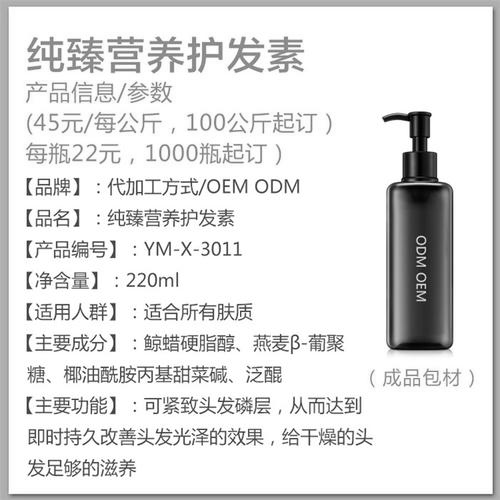

In [ ]:
display_images(result)

### Display recognized text

In [ ]:
print("\n".join([row.text for row in result.select("text").collect()]))

纯 臻 营 养 护 发 素
产 品 信 息 / 参 数

(45 元 / 每 公 斤 , 100 公 斤 起 订 )
每 瓶 22 元 , 1000 瓶 起 订 )

[ 晖 牌 】 ; 代 加 工 方 式 /OEM ODM

【 品 名 】 : 纯 臻 营 养 护 发 素

【 产 品 编 号 】 : YM-X-3011

[ 洗 吾 量 】 ; 220ml

[ 适 用 人 群 】 ; 适 各 所 有 肤 质

【 主 要 成 分 】 ; 鲸 蜡 硬 脂 醇 、 燕 麦 - 葡 棣

糠 、 柳 泉 酞 脓 丙 基 跋 莱 碱 、 泛 酮 ( 成 品 包 材 )
【 主 要 功 能 】 : 可 紧 致 头 发 磷 层 , 从 而 达 到
即 时 持 久 改 商 头 发 光 泽 的 效 果 , 给 干 燧 的 头
发 尽 够 的 滋 荣

 



## Clear cache

In [ ]:
result.unpersist()